In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

%matplotlib inline
sns.set_theme(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [2]:
train_values_damage = pd.read_csv('train_values_damage.csv', low_memory=False)
train_values_damage.head(10)

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,802906,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,3
1,1,28830,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,2
2,2,94947,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,3
3,3,590882,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,2
4,4,201944,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,3
5,5,333020,8,558,6089,2,10,9,5,t,...,0,0,0,0,0,0,0,0,0,2
6,6,728451,9,475,12066,2,25,3,4,n,...,0,0,0,0,0,0,0,0,0,3
7,7,475515,20,323,12236,2,0,8,6,t,...,0,0,0,0,0,0,0,0,0,1
8,8,441126,0,757,7219,2,15,8,6,t,...,0,0,0,0,0,0,0,0,0,2
9,9,989500,26,886,994,1,0,13,4,t,...,0,0,0,0,0,0,0,0,0,1


In [3]:
del train_values_damage['Unnamed: 0']
train_values_damage.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [4]:
short = train_values_damage[['building_id', 'geo_level_1_id', 'geo_level_2_id',\
                             'geo_level_3_id', 'count_floors_pre_eq', 'age',\
                             'area_percentage', 'height_percentage', 'damage_grade']]
short = short.rename(columns = {'building_id':'id_edificio', 'geo_level_1_id':'idg_1',\
                        'geo_level_2_id':'idg_2', 'geo_level_3_id':'idg_3',\
                        'count_floors_pre_eq':'cantidad_pisos', 'age':'edad',\
                        'area_percentage':'porcentaje_area',\
                        'height_percentage':'porcentaje_altura', 'damage_grade':'danio'})
short

,id_edificio,idg_1,idg_2,idg_3,cantidad_pisos,edad,porcentaje_area,porcentaje_altura,danio
0,802906,6,487,12198,2,30,6,5,3
1,28830,8,900,2812,2,10,8,7,2
2,94947,21,363,8973,2,10,5,5,3
3,590882,22,418,10694,2,10,6,5,2
4,201944,11,131,1488,3,30,8,9,3
...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,2
260597,669485,17,715,2060,2,0,6,5,3
260598,602512,17,51,8163,3,55,6,7,3
260599,151409,26,39,1851,2,10,14,6,2


# Densidad de las diferentes regiones

In [5]:
idg_1 = short[['idg_1', 'danio']]
idg_2 = short[['idg_2', 'danio']]
idg_3 = short[['idg_3', 'danio']]

Text(0, 0.5, 'ID geográfico 1')

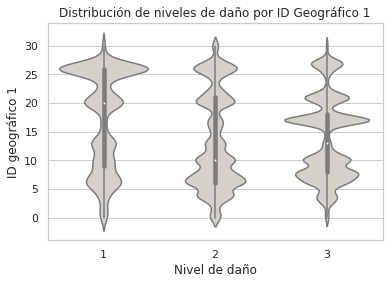

In [46]:
g = sns.violinplot(x=idg_1['danio'], y=idg_1['idg_1'], color='#D7D0C8')
g.set_title('Distribución de niveles de daño por ID Geográfico 1')
g.set_xlabel('Nivel de daño')
g.set_ylabel('ID geográfico 1')

Text(0, 0.5, 'ID geográfico 2')

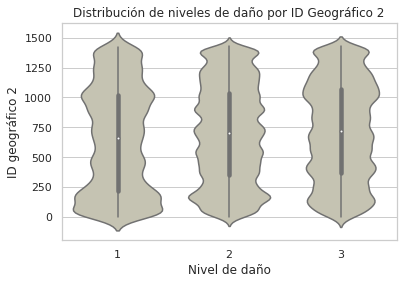

In [49]:
g = sns.violinplot(x=idg_2['danio'], y=idg_2['idg_2'], color='#C8C6AF')
g.set_title('Distribución de niveles de daño por ID Geográfico 2')
g.set_xlabel('Nivel de daño')
g.set_ylabel('ID geográfico 2')

Text(0, 0.5, 'ID geográfico 3')

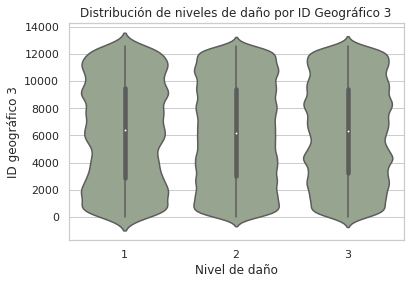

In [51]:
g = sns.violinplot(x=idg_3['danio'], y=idg_3['idg_3'], color='#95A78D')
g.set_title('Distribución de niveles de daño por ID Geográfico 3')
g.set_xlabel('Nivel de daño')
g.set_ylabel('ID geográfico 3')

## ¿Existen diferencias notables entre las ubicaciones geográficas afectadas de menor y mayor manera?

<AxesSubplot:xlabel='idg_1', ylabel='Density'>

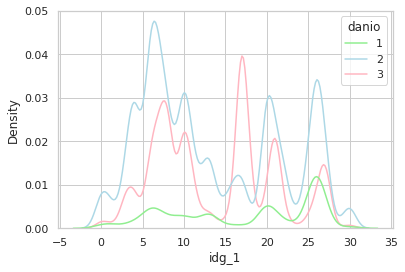

In [9]:
# Analizo principalmente idg_1, que resulta más visual por la menor variedad de
# valores.
# Distribución:
sns.kdeplot(data=idg_1, x="idg_1", hue="danio", palette=['lightgreen', 'lightblue', 'lightpink'])

Text(0, 0.5, 'Daño promedio')

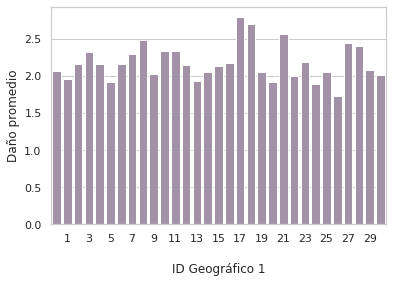

In [10]:
# Daño promedio por región:
idg_1_g = idg_1.groupby('idg_1').agg({'danio':'mean'})
idg_1_g = idg_1_g.reset_index()
sns.barplot(x=idg_1_g['idg_1'], y=idg_1_g['danio'], color='#a58faa')
for label in plt.gca().get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlabel('\nID Geográfico 1')
plt.ylabel('Daño promedio')

<AxesSubplot:xlabel='idg_2', ylabel='Density'>

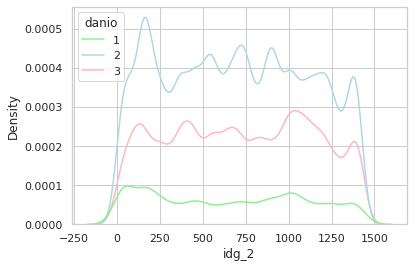

In [11]:
sns.kdeplot(data=idg_2, x="idg_2", hue="danio", palette=['lightgreen', 'lightblue', 'lightpink'])

<AxesSubplot:xlabel='idg_3', ylabel='Density'>

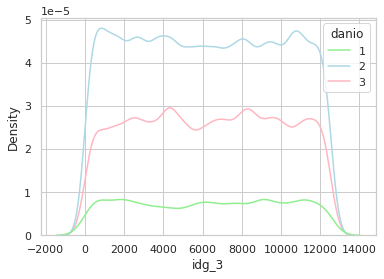

In [12]:
sns.kdeplot(data=idg_3, x="idg_3", hue="danio", palette=['lightgreen', 'lightblue', 'lightpink'])

## ¿Parece la cantidad de pisos guardar relación con el nivel de destrucción?

In [13]:
pisos = short[['id_edificio', 'cantidad_pisos', 'danio']]
pisos

,id_edificio,cantidad_pisos,danio
0,802906,2,3
1,28830,2,2
2,94947,2,3
3,590882,2,2
4,201944,3,3
...,...,...,...
260596,688636,1,2
260597,669485,2,3
260598,602512,3,3
260599,151409,2,2


In [14]:
pisos_g = pisos.groupby('cantidad_pisos').agg({'danio':'mean', 'id_edificio':'count'})
pisos_g = pisos_g.rename(columns={'id_edificio':'cantidad_edificios'})
pisos_g = pisos_g.reset_index()
pisos_g

,cantidad_pisos,danio,cantidad_edificios
0,1,2.042160,40441
1,2,2.239231,156623
2,3,2.396713,55617
3,4,2.117257,5424
4,5,2.114426,2246
5,6,1.856459,209
6,7,1.846154,39
7,8,2.000000,1
8,9,1.000000,1


<AxesSubplot:xlabel='cantidad_pisos', ylabel='danio'>

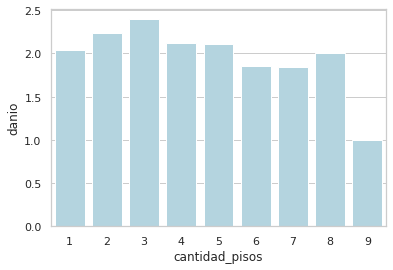

In [15]:
sns.barplot(x=pisos_g['cantidad_pisos'], y=pisos_g['danio'], data=pisos_g, color='lightblue')

<AxesSubplot:xlabel='cantidad_pisos', ylabel='cantidad_edificios'>

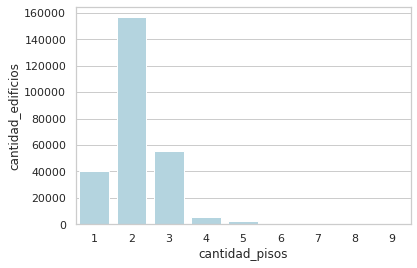

In [16]:
sns.barplot(x=pisos_g['cantidad_pisos'], y=pisos_g['cantidad_edificios'], data=pisos_g, color='lightblue')

## ¿Parece la antiguedad de un edificio tener relacion con su nivel de destrucción?

In [17]:
antiguedad = short[['id_edificio', 'edad', 'danio']]
antiguedad

,id_edificio,edad,danio
0,802906,30,3
1,28830,10,2
2,94947,10,3
3,590882,10,2
4,201944,30,3
...,...,...,...
260596,688636,55,2
260597,669485,0,3
260598,602512,55,3
260599,151409,10,2


<AxesSubplot:xlabel='danio', ylabel='edad'>

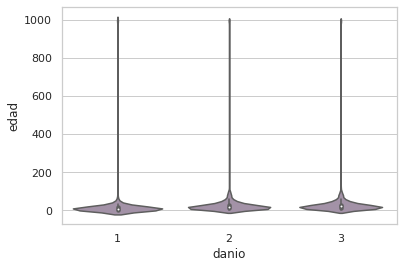

In [18]:
sns.violinplot(x=antiguedad['danio'], y=antiguedad['edad'], color='#a58faa')

In [19]:
antiguedad['edad'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
175        5
135        5
190        3
145        3
195        2
165        2
185        1
155        1
Name: edad, dtype: int64

##### 995 es un outlier

In [20]:
antiguedad.loc[antiguedad['edad'] > 200]['edad'].value_counts()

995    1390
Name: edad, dtype: int64

In [21]:
antiguedad_c = antiguedad.loc[antiguedad['edad'] <= 200]
antiguedad_c['edad'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: edad, dtype: int64

<AxesSubplot:xlabel='danio', ylabel='edad'>

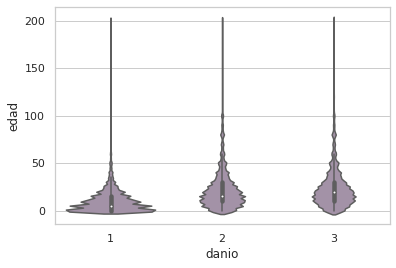

In [22]:
sns.violinplot(x=antiguedad_c['danio'], y=antiguedad_c['edad'], color='#a58faa')

In [23]:
antiguedad_g = antiguedad_c.groupby('edad').agg({'danio':'mean', 'id_edificio':'count'})
antiguedad_g = antiguedad_g.rename(columns={'id_edificio':'cantidad_edificios'})
antiguedad_g = antiguedad_g.reset_index()
antiguedad_g.head()

,edad,danio,cantidad_edificios
0,0,1.957529,26041
1,5,2.103481,33697
2,10,2.200689,38896
3,15,2.263455,36010
4,20,2.300510,32182


<AxesSubplot:xlabel='edad', ylabel='danio'>

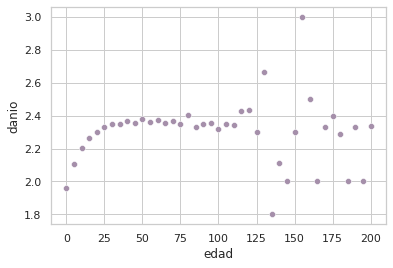

In [24]:
sns.scatterplot(x=antiguedad_g['edad'], y=antiguedad_g['danio'], color='#a58faa')

## Análisis de altura y área normalizadas

In [25]:
altura = short[['id_edificio', 'porcentaje_altura', 'danio']]
altura

,id_edificio,porcentaje_altura,danio
0,802906,5,3
1,28830,7,2
2,94947,5,3
3,590882,5,2
4,201944,9,3
...,...,...,...
260596,688636,3,2
260597,669485,5,3
260598,602512,7,3
260599,151409,6,2


<AxesSubplot:xlabel='danio', ylabel='porcentaje_altura'>

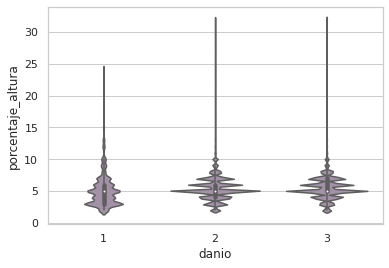

In [26]:
sns.violinplot(x=altura['danio'], y=altura['porcentaje_altura'], color='#a58faa')

In [27]:
altura['porcentaje_altura'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: porcentaje_altura, dtype: int64

<AxesSubplot:xlabel='danio', ylabel='porcentaje_altura'>

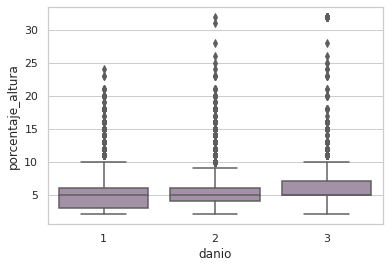

In [28]:
sns.boxplot(x=altura['danio'], y=altura['porcentaje_altura'], color='#a58faa')

In [29]:
altura_g = altura.groupby('porcentaje_altura').agg({'danio':'mean', 'id_edificio':'count'})
altura_g = altura_g.rename(columns={'id_edificio':'cantidad_edificios'})
altura_g = altura_g.reset_index()
altura_g.head()

,porcentaje_altura,danio,cantidad_edificios
0,2,2.156905,9305
1,3,2.002966,25957
2,4,2.221698,37763
3,5,2.270019,78513
4,6,2.303354,46477


<AxesSubplot:xlabel='porcentaje_altura', ylabel='danio'>

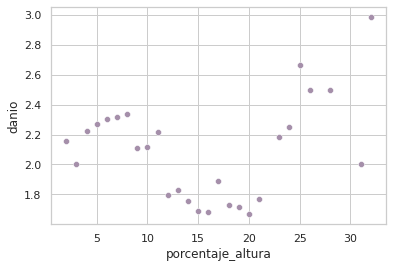

In [30]:
sns.scatterplot(x=altura_g['porcentaje_altura'], y=altura_g['danio'], color='#a58faa')

In [31]:
area = short[['id_edificio', 'porcentaje_area', 'danio']]
area

,id_edificio,porcentaje_area,danio
0,802906,6,3
1,28830,8,2
2,94947,5,3
3,590882,6,2
4,201944,8,3
...,...,...,...
260596,688636,6,2
260597,669485,6,3
260598,602512,6,3
260599,151409,14,2


<AxesSubplot:xlabel='danio', ylabel='porcentaje_area'>

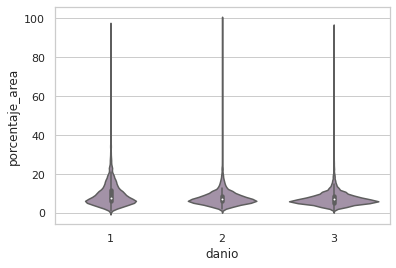

In [32]:
sns.violinplot(x=area['danio'], y=area['porcentaje_area'], color='#a58faa')

In [33]:
area['porcentaje_area'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: porcentaje_area, Length: 84, dtype: int64

<AxesSubplot:xlabel='danio', ylabel='porcentaje_area'>

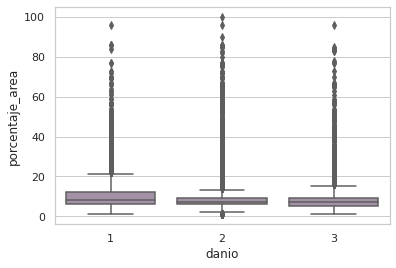

In [34]:
sns.boxplot(x=area['danio'], y=area['porcentaje_area'], color='#a58faa')

In [35]:
area_g = area.groupby('porcentaje_area').agg({'danio':'mean', 'id_edificio':'count'})
area_g = area_g.rename(columns={'id_edificio':'cantidad_edificios'})
area_g = area_g.reset_index()
area_g.head()

,porcentaje_area,danio,cantidad_edificios
0,1,2.188889,90
1,2,2.214398,3181
2,3,2.280139,11837
3,4,2.261281,19236
4,5,2.306503,32724


<AxesSubplot:xlabel='porcentaje_area', ylabel='danio'>

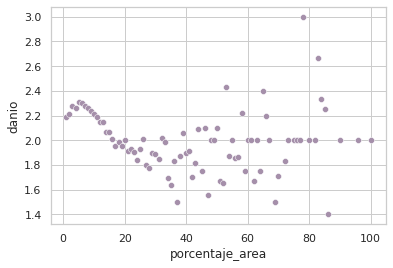

In [36]:
sns.scatterplot(x=area_g['porcentaje_area'], y=area_g['danio'], color='#a58faa')

In [37]:
# Limito el estudio a los porcentajes con más volumen en el dataset
altura_s = altura_g.loc[altura_g['cantidad_edificios'] > altura_g['cantidad_edificios'].mean()]
altura_s

,porcentaje_altura,danio,cantidad_edificios
1,3,2.002966,25957
2,4,2.221698,37763
3,5,2.270019,78513
4,6,2.303354,46477
5,7,2.319188,35465
6,8,2.336426,13902


<AxesSubplot:xlabel='porcentaje_altura', ylabel='danio'>

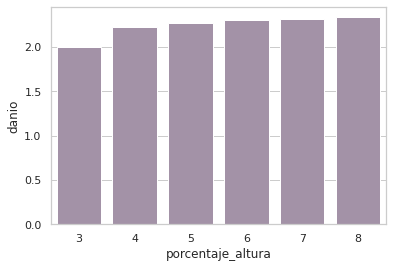

In [38]:
sns.barplot(x=altura_s['porcentaje_altura'], y=altura_s['danio'], color='#a58faa')

##### La tendencia es levemente hacia arriba, lo que tendría sentido ya que un edificio con mayor altura sería más propenso a movimientos bruscos que afecten su base

In [39]:
# Limito el estudio a los porcentajes con más volumen en el dataset
area_s = area_g.loc[area_g['cantidad_edificios'] > area_g['cantidad_edificios'].mean()]
area_s

,porcentaje_area,danio,cantidad_edificios
1,2,2.214398,3181
2,3,2.280139,11837
3,4,2.261281,19236
4,5,2.306503,32724
5,6,2.297908,42013
6,7,2.278325,36752
7,8,2.261452,28445
8,9,2.234695,22199
9,10,2.209889,15613
10,11,2.184655,13907


<AxesSubplot:xlabel='porcentaje_area', ylabel='danio'>

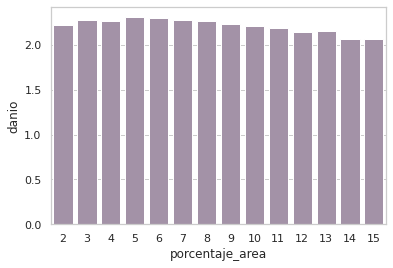

In [40]:
sns.barplot(x=area_s['porcentaje_area'], y=area_s['danio'], color='#a58faa')

##### La tendencia es levemente a la baja, lo que tendría sentido ya que un edificio con mayor área tiene mayor superficie de apoyo ante un temblor